<a href="https://colab.research.google.com/github/k2moon/ml-hg/blob/main/hg_03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학과 규제
---

## 핵심 키워드
- 다중 회귀
- 특성 공학
- 릿지
- 라쏘
- 하이퍼파라미터

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

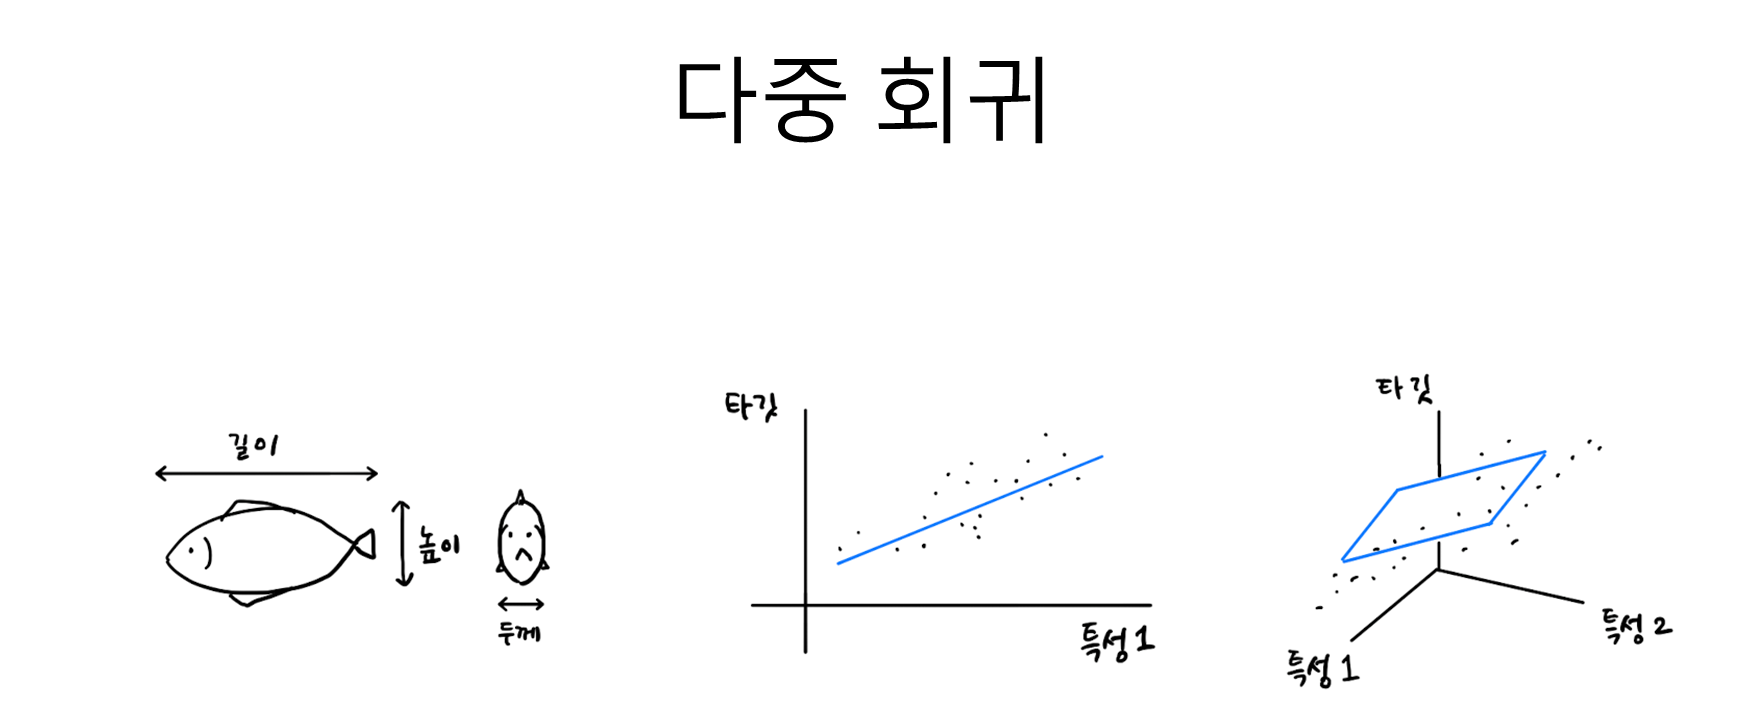

## 다중 회귀 multiple regression
---
- 여러 개의 특성을 사용한 선형 회귀
- 1개의 특성을 사용하면 직선, 2개의 특성을 사용하면 평면을 학습
- 3개의 특성 이상은 3차원 이상으로 그림으로 이해 힘드나 수학적으로 매우 복잡한 모델 생성 가능

## 특성 공학 feature engineering
---
- 기존의 특성을 사용해서 새로운 특성을 뽑아내는 작업
- 농어 길이 * 농어 높이
- 사이킷런에서 새로운 특성을 만들거나 전처리를 위한 다양한 클래스 제공
- fit(), transform()

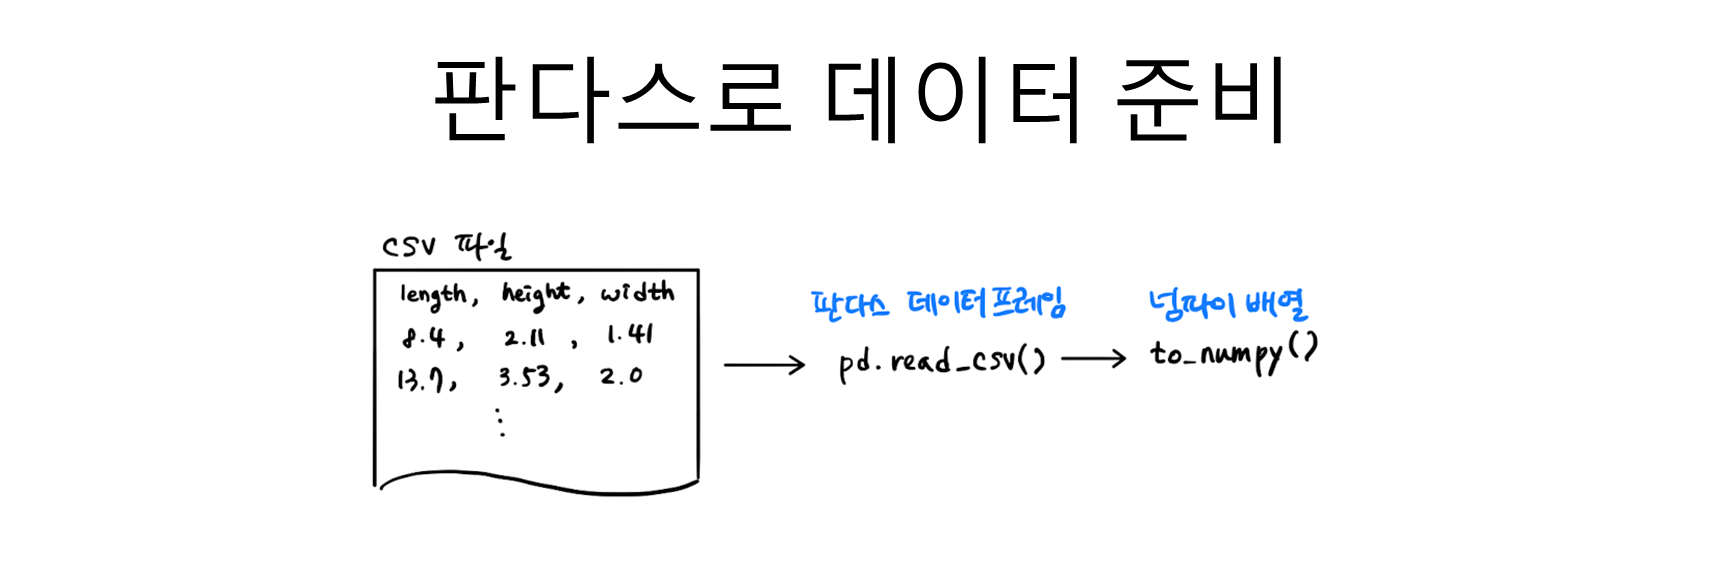

## 데이터 준비
---
- [length, height, width] : https://bit.ly/perch_csv_data
- target : https://bit.ly/perch_data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full, perch_full.shape)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
# target 무게 데이터
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
# 훈련 세트와 데이터 세트로 분할
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
train_input.shape

(42, 3)

## 다항 특성 만들기
---
- 사이킷런의 변환기 클래스 : transformer
- 사이킷런의 모델 클래스 : estimator
- from sklearn.preprocessing import PolynomialFeatures


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# 2개의 특성 2와 3의 특성 만들기, degree=2(기본 차수)
poly = PolynomialFeatures()

# fit() : 데이터 전달
poly.fit([[2, 3]])

# 1(bias), 2*1, 3*1, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# include_bias=False : 절편 미시용
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]),poly.transform([[2, 3]]).shape)

[[2. 3. 4. 6. 9.]] (1, 5)


In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [ ]:
print(train_poly.shape)

(42, 9)


In [ ]:
# 9개 특성의 정보
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
# 훈련 세트의 변화기로 테스트 세트 변환하기(중요)
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기
---
- 단순 회귀 모델 훈련과 방법 동일

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 훈련 세트 훈련 및 평가
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
# 테스트 세트 평가 
# - 농어 길이만 사용했을 때의 과소적합 문제 해결
print(lr.score(test_poly, test_target))

0.9714559911594134


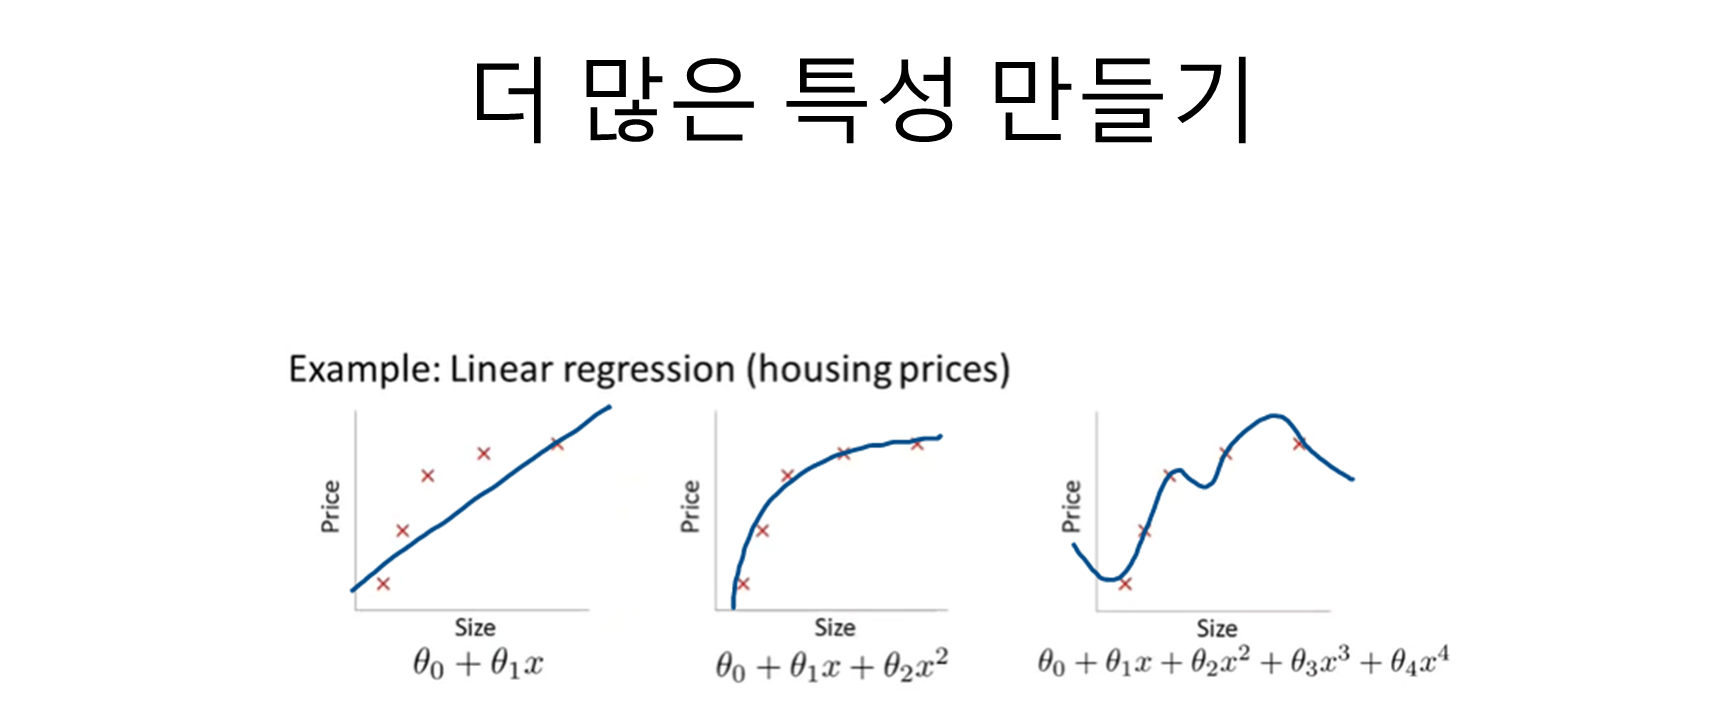

## 더 많은 특성 추가
---
- 모델의 복잡도 높이기
- degree 인수 값 높이기

In [ ]:
# 차수를 5로 설정 : degree=5
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
# 55개의 특성으로 늘어남
print(train_poly.shape)

(42, 55)


In [ ]:
# 정확도 거의 100%
# 42개의 샘플을 55개의 특성으로 설명 하므로 과대 적합 됨
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
# 복잡한 모델의 과적합 확인
print(lr.score(test_poly, test_target))

-144.40579242684848


## 과(대)적합 Overfitting
---

-  기계 학습(machine learning)에서 학습 데이터를 과하게 학습(overfitting)하는 것을 뜻 함, 일반적으로 학습 데이타는 실제 데이타의 부분 집합이므로 학습데이타에 대해서는 오차가 감소하지만 실제 데이타에 대해서는 오차가 증가 하는 것 <위키백과>

- 훈련 데이터의 특성에 너무 가깝게 맞춰져서 새로운 데이터에 일반화되기 어려운 경우 일어나는 현상, 주로 모형이 복잡해질수록 훈련 데이터에만 과적합되는 경향을 보임

### 과적합을 막는 방법
---
- 데이터의 양을 늘리기
- 모델의 복잡도 줄이기
- 가중치 규제(Regularization) 적용하기
- 신경망(딥러닝)에서 드롭아웃(Dropout), 신경망의 일부 사용 하지 않기

## 다중공선성 Multicollinearity
---
 
- 회귀 분석 시 설명 변수 중 두 개 이상의 변수들의 상관관계가 높아 회귀 계수 추정 결과를 신뢰할 수 없는 경우 “다중 공선성”이 존재한다고 말함

## 규제, 정규화 (Regularization) 
---
- 모수들의 크기를 제약해 모형을 단순화하여 과적합을 방지하는 한 방법
- 선형 회귀 모델에 규제를 추가한 모델 : 릿지 Ridge와 라쏘 Lasso

## Ridge/ Lasso 추정치는 OLS 추정치 (선형 회귀 추정치)에 비해 더 편향되어 있지만 (biased), 분산(Variance)이 낮아지기 때문에 예측 측면에서 더 좋은 결과를 냄
---

- 무슨 말인가?
- 최소 자승법 OLS (Ordinary Least Squares) : 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치 벡터를 구하는 방법

## 편향과 분산 Bias and Variance
---

![Trade-off Between Variance and Bias](https://assaeunji.github.io/images/ridge-tradeoff.png)

- 모델이 가질 수 있는 오차의 기댓값은 크게 편향(bias)와 분산(variance)이 있음

### 편향 Bais
---

- 빨간색 원이 true 값의 영역이고 파란색 점이 예측값
- 편향은 실제값과 예측값들의 기댓값이 얼마나 차이가 나는 지를 나타냄
- Bias 오차가 높다는 것은 실측치와 예측치간의 오차가 큰 경우 => 과소적합
- 편향이 낮으면 예측값들이 빨간색 원의 중심 모여있는 모습
- 편향이 높으면 빨간색 원에서 벗어난 모습


### 분산 Variance
---

- 분산(Variance)는 예측값들과 예측값들의 기댓값이 얼마나 차이가 나는 지를 나타냄
- 분산이 낮으면 예측값들이 응집되어 있고, 분산이 크면 예측값들이 퍼져 있음
- Variance 오차가 높다는 것은 예측의 범위가 넓다는 것 => 과대적합
- 규제는 이 중 분산을 줄여 머신러닝의 정확도 과적합을 방지
- 참고 사이트 : https://tinyurl.com/bdcmsa57


### 편향과 분산 Trade-off Between Bias and Variance
---

![Trade-off Between Bias and Variance](https://assaeunji.github.io/images/ridge-tradeoff2.png)



- 트레이드-오프, trade-off : 어느 한편을 늘리면 다른 한편은 그 만큼 줄어드는 것을 이르는 말, 상충 관계
- 분산과 편차를 동시에 낮추는 것은 불가능
- 모형이 복잡할수록 새로운 데이터의 적합 값에 대한 분산은 커지고, 편차는 작아지는 성질
- 모형이 복잡할수록 분산이 커지는 이유는 과적합(Overfitting) 때문
- 모형이 복잡하다는 뜻은 훈련 데이터의 특성에 딱 맞게 wiggly(꾸불꾸불)하게 적합되었음을 시사

![](https://s3-ap-northeast-2.amazonaws.com/opentutorials-user-file/module/3653/12456.png)

## 규제 regularization
---

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcEvutu%2FbtqzpXu4hUq%2FkWVbPVRp56RTEjnY2a09fK%2Fimg.png)


- 훈련 세트의 과적합이 되지 않도록 만드는 것
- 과적합을 피하려면, 이 구불구불한 것을 조금 펴주면 됨 
- 구불구불 한 것을 펴주려면, 모델의 차수를 줄여주기
- 선형 회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만들기
- 선형 회귀 모델에 규제를 추가한 모델 : 릿지 ridge와 라쏘 lasso
- 참고 사이트 : https://tinyurl.com/yaduscfs

### 노름 Norm
---

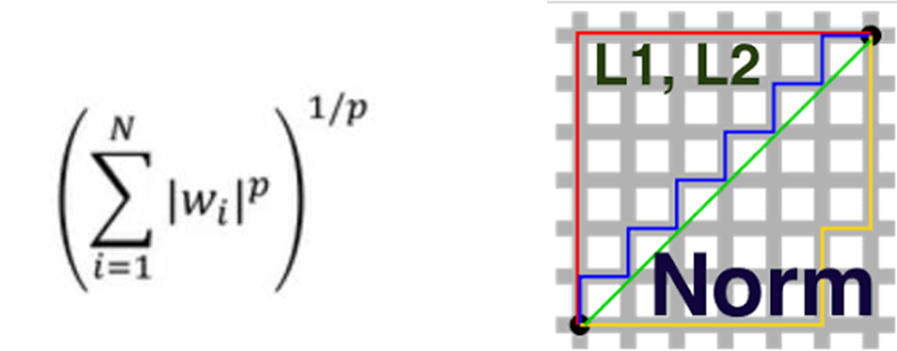

- Norm은 벡터의 길이 혹은 크기를 측정하는 방법(함수)
- Norm이 측정한 벡터의 크기는 원점에서 벡터 좌표까지의 거리 
- p는 Lorm의 차수를 의미
- p가 1이면 L1 Norm이고 p가 2이면 L2 Norm
- n은 대상 벡터의 요소 수
- 참고 사이트 : http://taewan.kim/post/norm/

### L1 노름
---

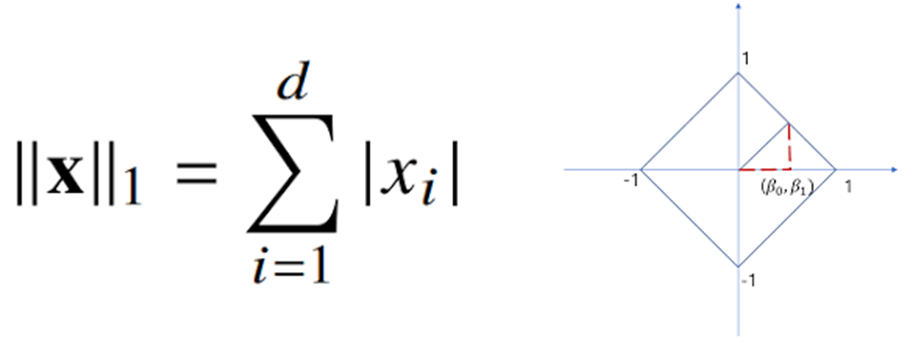

- L1 Norm은 p가 1인 norm입
- Taxicab Norm 혹은 맨허튼 노름(Manhattan norm)
- 벡터의 요소에 대한 절댓값의 합
- 요소의 값 변화를 정확하게 파악
- L1 규제 Regularization, Computer Vision 등에서 사용

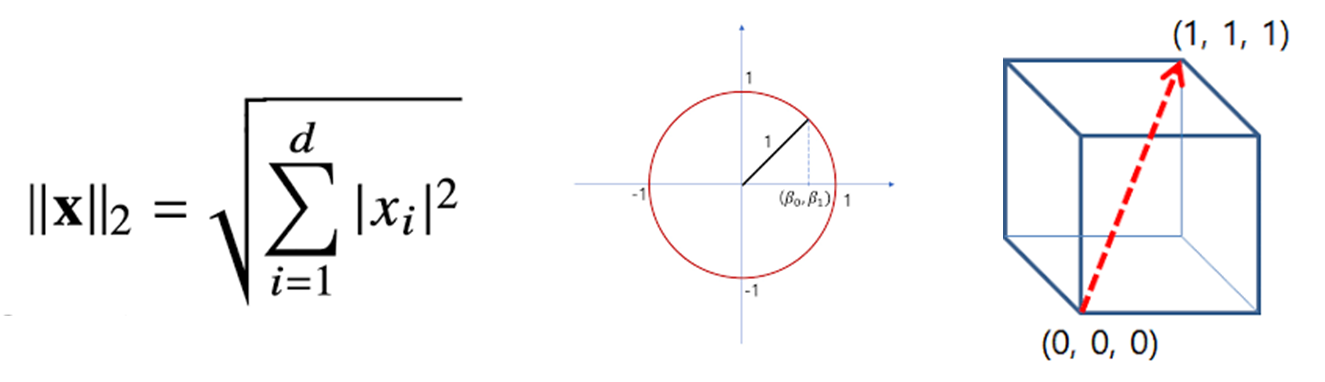

- L1 Norm은 p가 2인 norm입
-  n 차원 좌표평면(유클리드 공간)에서의 벡터의 크기를 계산하기 때문에 유클리드 노름(Euclidean norm)
- 피타고라스 정리는 2차원 좌표 평면상의 최단 거리를 계산하는 L2 Norm
- 벡터의 요소에 대한 절댓값의 합
- L2 규제 Regularization, kNN 알고리즘, kmean 알고리즘 등에서 사용

### MSE Contour
---

![MSE Contour](https://images.velog.io/images/cleansky/post/f9115c1c-1fbd-45de-b49e-4d67740072ed/image.png)

- MSE contour란 (2차원 평면의 경우) 동일한 MSE를 갖는 점들을 연결한 선
- 독립변수가 2일 경우  2차원에서의 conic equation 형태
- 독립변수가 2일 경우  3차원에서의 원뿔 형태
- 수학적 판별식에 의해서 원뿔의 단면 타원의 형태를 가짐
- conic equation 참고 사이트 : https://m.blog.naver.com/kart0604/220864070797

### 손실,비용 함수 Cost Function
---
> **$J(\theta) = \frac{1}{2m}\displaystyle\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$**

> **$ \hat{\beta} = arg_{\beta}min(y-X\beta)^{T}(y-X\beta)$**

## 릿지 Ridge Regression
---


![Ridge Regression](https://miro.medium.com/max/720/1*lFmQebk5GoibKN2ZQYzYpw.png)

**L2 제약식이 비용함수에 포함됨**
> **$ J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda }{2} \displaystyle\sum_{j=1}^{m} \theta_j^2  $**

> **$ \hat{\beta} = arg_{\beta}min(y-X\beta)^{T}(y-X\beta)^{T}  s.t. \parallel\beta\parallel^{2}< t $**

> **$ J(\theta) = J(\theta) + \alpha \parallel W\parallel_2^2 $**


- 수학에서 s.t.는 such that 즉, '뒤에 있는 것을 만족하는'이라는 뜻
- 계수를 제곱한 값의 합으로 규제 적용 =>  L2 규제
- L2 제약식이 포함된 목적식을 최소화하는 회귀계수 β를 찾으면 됨
- 회귀계수의 제곱의 합을 t로 제한
- alpha 매개변수로 규제의 강도 조절
- alpha 값이 커지면 규제가 커져 계수의 값을 줄이는 역할을 함
- 라쏘와 달리 가중치를 0으로 만들지는 않지만, 중요하지 않은 변수를 0과 가깝게 만들어줌으로써 과적합을 방지함

## 표준화 
---
- 각 독립변수들은 표준화되어 평균이 0이고 분산은 1
- y도 반드시 표준화되어야 함
- 특성의 스케일이 표준화 되지 않으면 곱해지는 계수의 값의 차이가 크게 남
- 사이킷런의 from sklearn.preprocessing import StandardScaler  사용

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
train_scaled.shape,test_scaled.shape

((42, 55), (14, 55))

In [ ]:
train_scaled[0]

array([-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
       -0.95745849, -0.93942079, -0.94342509, -0.94100107, -0.88757122,
       -0.88399964, -0.89100599, -0.87785292, -0.88311456, -0.88430909,
       -0.8691891 , -0.87259422, -0.87147928, -0.86603533, -0.82233944,
       -0.82171953, -0.8280588 , -0.81928269, -0.82512549, -0.8278857 ,
       -0.81486775, -0.82006923, -0.82177279, -0.82010716, -0.80835934,
       -0.81274154, -0.81321125, -0.8098514 , -0.80275974, -0.7637909 ,
       -0.76597773, -0.77150714, -0.76668667, -0.77246614, -0.77577893,
       -0.76571689, -0.77162398, -0.77472752, -0.77517751, -0.76290623,
       -0.76877311, -0.77148634, -0.77113383, -0.767785  , -0.75814062,
       -0.76376113, -0.76586966, -0.76449499, -0.75967179, -0.75143746])

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [ ]:
# 적절한 그림을 그리기 위해서 지수로 변환
np.log10(alpha_list)

array([-3., -2., -1.,  0.,  1.,  2.])

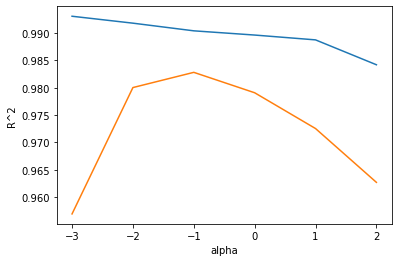

In [ ]:
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [ ]:
# 최적의 alpha 값으로 최종 훈련 및 평가
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


#### target 표준화
---

In [ ]:
# target 표준화 와 최적의 alpha 값으로 최종 훈련 및 평가

# 2차원 변환
train_target_d2 = train_target.reshape(-1,1)
test_target_d2 = test_target.reshape(-1,1)

ss2 = StandardScaler()
ss2.fit(train_target_d2)

# 표준화 
train_target_scale = ss2.transform(train_target_d2)
test_target_scale = ss2.transform(test_target_d2)

# 1차원 target으로 변경
train_target_d1 = train_target_scale.reshape(-1)
test_target_d1 = test_target_scale.reshape(-1)
#print(train_target_d1.shape,test_target_d1.shape)

# 모델 훈련
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target_d1)

# 평가
print(ridge.score(train_scaled, train_target_d1))
print(ridge.score(test_scaled, test_target_d1))

0.9903815817570365
0.9827976465386885


## 라쏘 회귀 LASSO Regression
---

![Lasso Regression](https://miro.medium.com/max/720/1*P3bTxrYuLGhF5-m0WEgomQ.png)

**L1 제약식이 비용함수에 포함됨**
> **$ J(\theta) = \frac{1} {2m} \displaystyle\sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + {\lambda } \displaystyle\sum_{j=1}^{m} \mid \theta_j \mid  $**

> **$ \hat{\beta} = arg_{\beta}min(y-X\beta)^{T}(y-X\beta)^{T}  s.t. \parallel \beta \parallel< t $**

> **$ J(\theta) = J(\theta) + \alpha \parallel W\parallel_1 $**


- 계수의 절대 값의 합으로 규제 적용 =>  L1 규제
- L1 제약식이 포함된 목적식을 최소화하는 회귀계수 β를 찾으면 됨
- 회귀계수의 절대값의 합을 t로 제한
- alpha 매개변수로 규제의 강도 조절
- alpha 값이 커지면 규제가 커져 계수의 값을 줄이는 역할을 함
- 리지와 달리 가중치를 0으로 만들어줌으로써 과적합을 방지함과 동시에 특성 선택의 효과도 있음

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=50000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.542e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.009e+03, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


> 참고 : ConvergenceWarning은 라쏘 모델의 경우 최적의 계수를 찾기 위해 반복적인 계산을 하는데 횟수 부족 시 나타남, 지금의 예에서는 회수를 늘려 훈련 해도 결과에 큰 영향이 없어 신경 안써도 됨(50000번으로 늘리고 결과를 봐도 동일함)

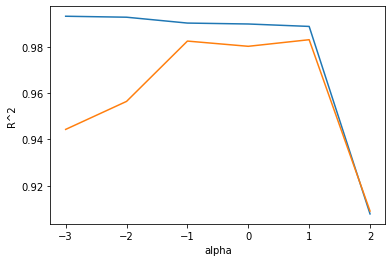

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
# 최적의 alpha 값으로 훈련
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
# 계수의 값이 0이된 특성 개수
print(np.sum(lasso.coef_ == 0))

40


## 하이퍼 파라미터 Hyper parameter
---
- 머신러닝 알고리즘이 학습하지 않는 파라미터
- 사용자가 직접 셋팅해 주는 값
- 릿지와 라쏘의 alpha 값, 학습률 Learning Rate, 에포크 수(훈련 반복 횟수, Epoch), KNN의 K값 등등